# Hamilton vs Experience

When we started looking at Hamilton's data we noticed he didn't start winning chamionships until a few years into competing in Formula 1. We discovered this coincided with Hamilton switching constructors. At the beginning of his career, he was driving for McLaren from 2007 until he switched to Mercedes in 2013. This is where we started investigating whether Hamilton's experience dictated his win rate. 

In [1]:
import warnings
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
from scipy import stats
import datetime as datetime
from datetime import date
warnings.filterwarnings("ignore")

In [2]:
drivers = "../Resources/drivers.csv"
races = "../Resources/races.csv"
driver_standings = "../Resources/driver_standings.csv"
constructor_results = "../Resources/constructor_results.csv"
constructor_standings = "../Resources/constructor_standings.csv"
lap_times = "../Resources/lap_times.csv"
pit_stops = "../Resources/pit_stops.csv"
qualifying = "../Resources/qualifying.csv"
status = "../Resources/status.csv"
results = "../Resources/results.csv"
constructors = "../Resources/constructors.csv"

drivers_df = pd.read_csv(drivers)
races_df = pd.read_csv(races)
driver_standings_df= pd.read_csv(driver_standings)
constructor_results_df = pd.read_csv(constructor_results)
constructor_standings_df = pd.read_csv(constructor_standings)
lap_times_df = pd.read_csv(lap_times)
pit_stops_df = pd.read_csv(pit_stops)
qualifying_df = pd.read_csv(qualifying)
status_df = pd.read_csv(status)
results_df = pd.read_csv(results)
constructors_df = pd.read_csv(constructors)

In [3]:
drivers_df.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


In [4]:
drivers_df['dob'] = pd.to_datetime(drivers_df.dob)

In [5]:
drivers_df['DOB1'] = drivers_df['dob'].dt.strftime('%m/%d/%Y')
drivers_df.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,url,DOB1
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,01/07/1985
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld,05/10/1977
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg,06/27/1985
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso,07/29/1981
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen,10/19/1981


In [6]:
#Created formula to create an age column from the DOB column

def calculate_age(born):
        born = datetime.datetime.strptime(born, "%m/%d/%Y").date()
        today = date.today()
        return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

In [7]:
#Merging data for analysis

drivers_df['fullName'] = drivers_df['forename'] +" "+ drivers_df['surname']
age_results = pd.merge(results_df, drivers_df, on='driverId', how='inner')

df1 = age_results[['raceId', 
                   'driverId', 
                   'constructorId', 
                   'positionOrder', 
                   'points', 
                   'DOB1', 
                   'nationality', 
                   'fullName']].copy()
race_data = pd.merge(df1, races_df, on='raceId', how='inner')

df2 = race_data[['raceId', 
                 'driverId', 
                 'constructorId', 
                 'positionOrder', 
                 'points', 
                 'DOB1', 
                 'nationality', 
                 'fullName', 
                 'year', 
                 'name']].copy()
constructor_data = pd.merge(df2, constructors_df, on='constructorId', how='inner')

df3 = constructor_data [['positionOrder', 
                         'points', 
                         'DOB1', 
                         'nationality_x', 
                         'fullName', 
                         'year', 
                         'name_x', 
                         'name_y', 
                         'nationality_y']].copy()

df4 = df3.rename(columns={'positionOrder': 'Position',
                          'points': 'Points',
                          'DOB1': 'DOB', 
                          'nationality_x': 'Driver_Nationality', 
                          'fullName': 'Driver_Name', 
                          'year': 'Race_Year', 
                          'name_x': 'Race_Name', 
                          'name_y': 'Contractor', 
                          'nationality_y': 'Contractor_Nationality'})

clean_data = df4[df4["Race_Year"] >=2007]
clean_data['Age'] = clean_data['DOB'].apply(calculate_age)

clean_data.head(10)

,Position,Points,DOB,Driver_Nationality,Driver_Name,Race_Year,Race_Name,Contractor,Contractor_Nationality,Age
0,1,10.0,01/07/1985,British,Lewis Hamilton,2008,Australian Grand Prix,McLaren,British,35
1,5,4.0,10/19/1981,Finnish,Heikki Kovalainen,2008,Australian Grand Prix,McLaren,British,39
2,5,4.0,01/07/1985,British,Lewis Hamilton,2008,Malaysian Grand Prix,McLaren,British,35
3,3,6.0,10/19/1981,Finnish,Heikki Kovalainen,2008,Malaysian Grand Prix,McLaren,British,39
4,13,0.0,01/07/1985,British,Lewis Hamilton,2008,Bahrain Grand Prix,McLaren,British,35
5,5,4.0,10/19/1981,Finnish,Heikki Kovalainen,2008,Bahrain Grand Prix,McLaren,British,39
6,3,6.0,01/07/1985,British,Lewis Hamilton,2008,Spanish Grand Prix,McLaren,British,35
7,17,0.0,10/19/1981,Finnish,Heikki Kovalainen,2008,Spanish Grand Prix,McLaren,British,39
8,2,8.0,01/07/1985,British,Lewis Hamilton,2008,Turkish Grand Prix,McLaren,British,35
9,12,0.0,10/19/1981,Finnish,Heikki Kovalainen,2008,Turkish Grand Prix,McLaren,British,39


In [8]:
clean_data.describe()

,Position,Points,Race_Year,Age
count,5619.000000,5619.000000,5619.000000,5619.000000
mean,11.285282,4.155633,2013.399537,34.449902
std,6.293460,6.602785,3.854603,6.528883
min,1.000000,0.000000,2007.000000,21.000000
25%,6.000000,0.000000,2010.000000,30.000000
50%,11.000000,0.000000,2013.000000,34.000000
75%,17.000000,6.000000,2017.000000,39.000000
max,24.000000,50.000000,2020.000000,51.000000


# Analyzing the Top 3 points winners from cleaned data

To analyze Hamilton's win rate throughout his career I wanted to compare him to the next three driver's win rates through a linear regression. 

In [9]:
#create dataframe for Hamilton's wins vs experience

#Hamilton dataframe
ham = clean_data
ham = ham.loc[ham['Position']==1]

hamilton = ham.query('Driver_Name== ["Lewis Hamilton"]')

hamilton['Yearly_Points']=hamilton.groupby(by='Race_Year')['Points'].transform('sum').sort_values()
hamilton['Yearly_Wins']=hamilton.groupby(by='Race_Year')['Position'].transform('count').sort_values()

ham_d = hamilton[['Race_Year','Yearly_Points','Yearly_Wins','Driver_Name']].copy()

ham_data = ham_d.drop_duplicates(subset=['Race_Year'])

ham_data

,Race_Year,Yearly_Points,Yearly_Wins,Driver_Name
0,2008,50.0,5,Lewis Hamilton
46,2007,40.0,4,Lewis Hamilton
88,2009,20.0,2,Lewis Hamilton
116,2010,75.0,3,Lewis Hamilton
146,2011,75.0,3,Lewis Hamilton
192,2012,100.0,4,Lewis Hamilton
8656,2013,25.0,1,Lewis Hamilton
8678,2014,300.0,11,Lewis Hamilton
8714,2015,250.0,10,Lewis Hamilton
8762,2016,250.0,10,Lewis Hamilton


In [10]:
#create dataframe comparing Sebastian Vettel's wins vs experience

# Sebastian Vettel dataframe
seb = clean_data
seb = seb.loc[seb['Position']==1]

driver_seb = seb.query('Driver_Name== ["Sebastian Vettel"]')

driver_seb['Yearly_Points']=driver_seb.groupby(by='Race_Year')['Points'].transform('sum').sort_values()
driver_seb['Yearly_Wins']=driver_seb.groupby(by='Race_Year')['Position'].transform('count').sort_values()

driver_seb2 = driver_seb[['Race_Year','Yearly_Points','Yearly_Wins','Driver_Name']].copy()

driver_seb3 = driver_seb2.drop_duplicates(subset=['Race_Year'])

driver_seb3

,Race_Year,Yearly_Points,Yearly_Wins,Driver_Name
4164,2008,10.0,1,Sebastian Vettel
4972,2015,75.0,3,Sebastian Vettel
5050,2017,125.0,5,Sebastian Vettel
5090,2018,125.0,5,Sebastian Vettel
5159,2019,25.0,1,Sebastian Vettel
7355,2009,40.0,4,Sebastian Vettel
7389,2010,125.0,5,Sebastian Vettel
7423,2011,275.0,11,Sebastian Vettel
7467,2012,125.0,5,Sebastian Vettel
7503,2013,325.0,13,Sebastian Vettel


In [11]:
#create dataframe comparing Nico Rosberg's wins vs experience

# Nico Rosberg dataframe
nico = clean_data
nico = nico.loc[nico['Position']==1]

driver_nico = nico.query('Driver_Name== ["Nico Rosberg"]')

driver_nico['Yearly_Points']=driver_nico.groupby(by='Race_Year')['Points'].transform('sum').sort_values()
driver_nico['Yearly_Wins']=driver_nico.groupby(by='Race_Year')['Position'].transform('count').sort_values()

driver_nico2 = driver_nico[['Race_Year','Yearly_Points','Yearly_Wins','Driver_Name']].copy()

driver_nico3 = driver_nico2.drop_duplicates(subset=['Race_Year'])

driver_nico3

,Race_Year,Yearly_Points,Yearly_Wins,Driver_Name
8602,2012,25.0,1,Nico Rosberg
8649,2013,50.0,2,Nico Rosberg
8677,2014,125.0,5,Nico Rosberg
8723,2015,150.0,6,Nico Rosberg
8753,2016,225.0,9,Nico Rosberg


findfont: Font family ['bauhaus 93'] not found. Falling back to DejaVu Sans.
findfont: Font family ['bauhaus 93'] not found. Falling back to DejaVu Sans.


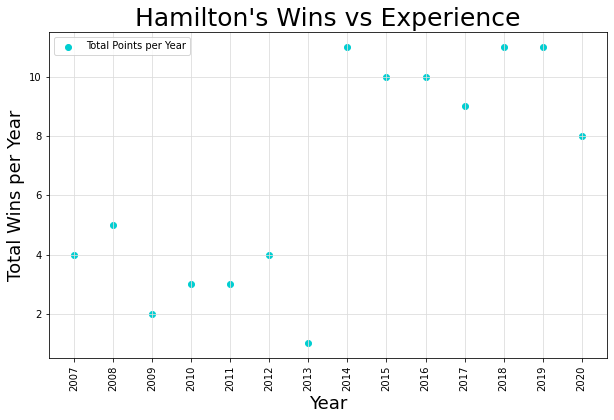

In [12]:
 # Generate a scatter plot of Hamilton's win rate as experience increased in F1
plt.figure(figsize=(10,6))
year1 = ham_data.iloc[:,0]
ham_win_rate = ham_data.iloc[:,2]
plt.scatter(year1,ham_win_rate, color='darkturquoise')
plt.xticks(year1, rotation=90)
plt.title("Hamilton's Wins vs Experience", fontsize = 25, fontname = 'bauhaus 93')
plt.xlabel('Year', fontsize = 18, fontname = 'bauhaus 93')
plt.ylabel('Total Wins per Year', fontsize = 18, fontname = 'bauhaus 93')
plt.legend(['Total Points per Year'])
plt.grid(color='gainsboro')
plt.show()

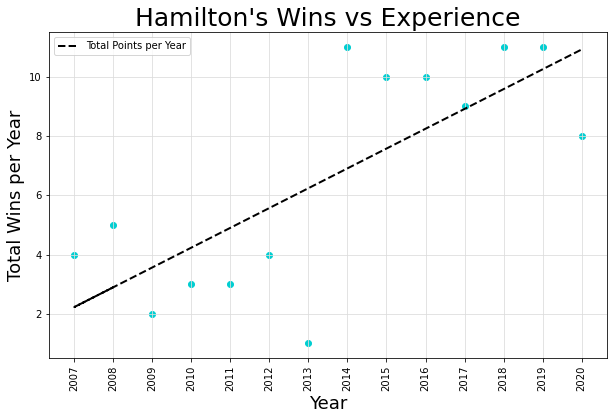

In [13]:
#Hamilton's win rate linear regression

age_slope, age_int, age_r, age_p, age_std_err = stats.linregress(year1, ham_win_rate)

age_fit = age_slope * year1 + age_int

plt.figure(figsize=(10,6))
year1 = ham_data.iloc[:,0]
ham_win_rate = ham_data.iloc[:,2]
plt.plot(year1,age_fit,"--k", linewidth=2)
plt.scatter(year1,ham_win_rate, color='darkturquoise')
plt.title("Hamilton's Wins vs Experience", fontsize = 25, fontname = 'bauhaus 93')
plt.xticks(year1, rotation=90)
plt.xlabel('Year', fontsize = 18, fontname = 'bauhaus 93')
plt.ylabel('Total Wins per Year', fontsize = 18, fontname = 'bauhaus 93')
plt.legend(['Total Points per Year'])
plt.grid(color='gainsboro')
plt.show()

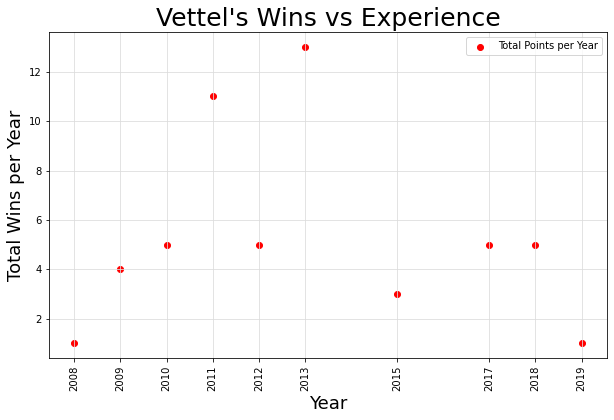

In [14]:
plt.figure(figsize=(10,6))
year2 = driver_seb3.iloc[:,0]
seb_wins = driver_seb3.iloc[:,2]

plt.scatter(year2,seb_wins, color='red')
plt.xticks(year2, rotation=90)
plt.title("Vettel's Wins vs Experience", fontsize = 25, fontname = 'bauhaus 93')
plt.xlabel('Year', fontsize = 18, fontname = 'bauhaus 93')
plt.ylabel('Total Wins per Year', fontsize = 18, fontname = 'bauhaus 93')
plt.legend(['Total Points per Year'])
plt.grid(color='gainsboro')

plt.show()

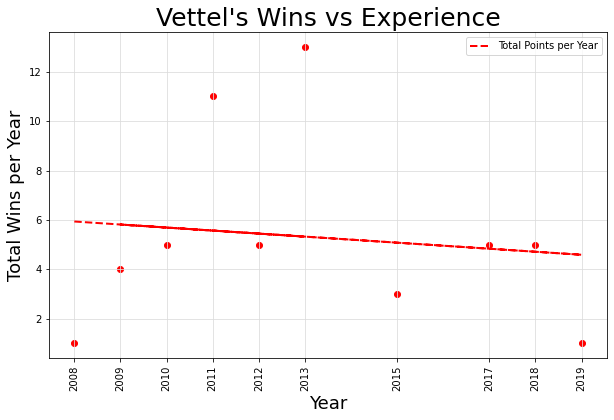

In [15]:
#Vettel's win rate linear regression

seb_slope, seb_int, seb_r, seb_p, seb_std_err = stats.linregress(year2, seb_wins)

seb_fit = seb_slope * year2 + seb_int

plt.figure(figsize=(10,6))
year2 = driver_seb3.iloc[:,0]
seb_wins = driver_seb3.iloc[:,2]
plt.plot(year2,seb_fit,"r--", linewidth=2)
plt.scatter(year2,seb_wins, color='red')
plt.xticks(year2, rotation=90)
plt.title("Vettel's Wins vs Experience", fontsize = 25, fontname = 'bauhaus 93')
plt.xlabel('Year', fontsize = 18, fontname = 'bauhaus 93')
plt.ylabel('Total Wins per Year', fontsize = 18, fontname = 'bauhaus 93')
plt.legend(['Total Points per Year'])
plt.grid(color='gainsboro')

plt.show()

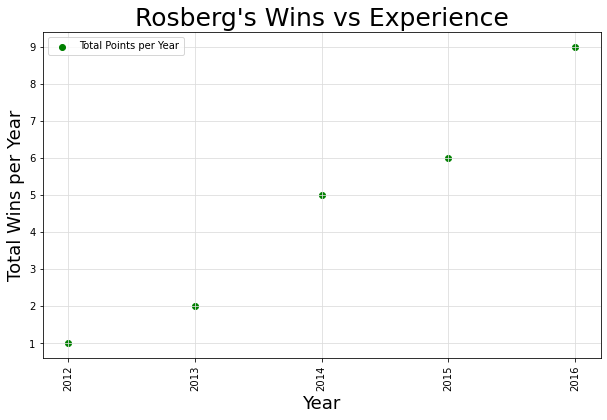

In [16]:
plt.figure(figsize=(10,6))
year3 = driver_nico3.iloc[:,0]
nico_wins = driver_nico3.iloc[:,2]

plt.scatter(year3,nico_wins, color='green')
plt.xticks(year3, rotation=90)
plt.title("Rosberg's Wins vs Experience", fontsize = 25, fontname = 'bauhaus 93')
plt.xlabel('Year', fontsize = 18, fontname = 'bauhaus 93')
plt.ylabel('Total Wins per Year', fontsize = 18, fontname = 'bauhaus 93')
plt.legend(['Total Points per Year'])
plt.grid(color='gainsboro')

plt.show()

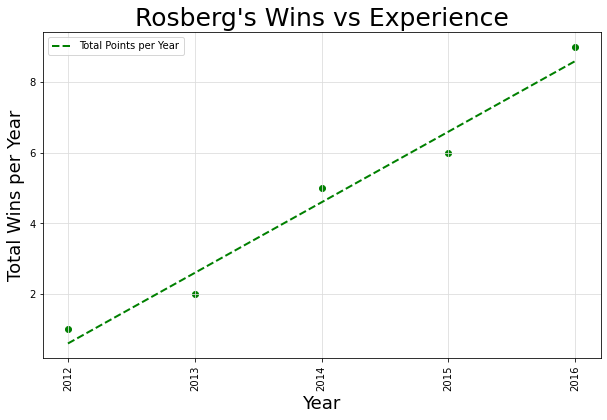

In [17]:
#Rosberg's win rate linear regression

nico_slope, nico_int, nico_r, nico_p, nico_std_err = stats.linregress(year3, nico_wins)

nico_fit = nico_slope * year3 + nico_int

plt.figure(figsize=(10,6))
year3 = driver_nico3.iloc[:,0]
nico_wins = driver_nico3.iloc[:,2]
plt.plot(year3,nico_fit,"g--", linewidth=2)
plt.scatter(year3,nico_wins, color='green')
plt.xticks(year3, rotation=90)
plt.title("Rosberg's Wins vs Experience", fontsize = 25, fontname = 'bauhaus 93')
plt.xlabel('Year', fontsize = 18, fontname = 'bauhaus 93')
plt.ylabel('Total Wins per Year', fontsize = 18, fontname = 'bauhaus 93')
plt.legend(['Total Points per Year'])
plt.grid(color='gainsboro')

plt.show()

In [20]:
#create dataframe comparing top 3 drivers age vs experience

#comparison dataframe
comp_data = clean_data
comp_data = comp_data.loc[comp_data['Position']==1]

drivers = comp_data.query('Driver_Name== ["Lewis Hamilton", "Sebastian Vettel", "Nico Rosberg"]')

drivers['Yearly_Points']=drivers.groupby(by='Race_Year')['Points'].transform('sum').sort_values()
drivers['Yearly_Wins']=drivers.groupby(by='Race_Year')['Position'].transform('count').sort_values()

drivers2 = drivers[['Race_Year','Yearly_Points','Yearly_Wins','Driver_Name']].copy()

drivers_ex = drivers2.drop_duplicates(subset=['Race_Year'])

drivers_ex

,Race_Year,Yearly_Points,Yearly_Wins,Driver_Name
0,2008,60.0,6,Lewis Hamilton
46,2007,40.0,4,Lewis Hamilton
88,2009,60.0,6,Lewis Hamilton
116,2010,200.0,8,Lewis Hamilton
146,2011,350.0,14,Lewis Hamilton
192,2012,250.0,10,Lewis Hamilton
4972,2015,475.0,19,Sebastian Vettel
5050,2017,350.0,14,Sebastian Vettel
5090,2018,400.0,16,Sebastian Vettel
5159,2019,304.0,12,Sebastian Vettel


findfont: Font family ['gill sans mt'] not found. Falling back to DejaVu Sans.


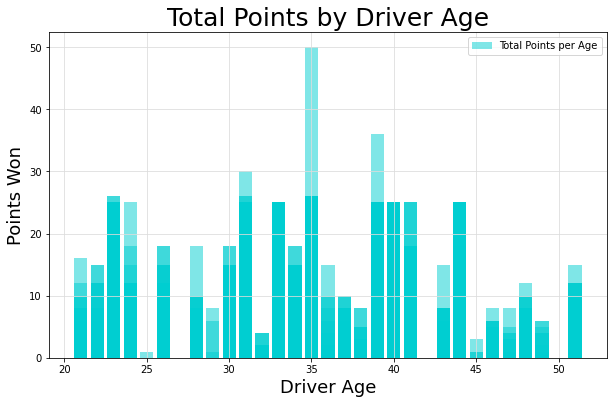

In [19]:
#Analyzing the total points won by driver based on age from our cleaned dataframe. 

plt.figure(figsize=(10,6))

x_values = clean_data['Age']
y_values = clean_data['Points']
plt.title('Total Points by Driver Age', fontsize = 25, fontname = 'bauhaus 93')
plt.bar(x_values,y_values, color='darkturquoise', alpha=0.5, align="center")
plt.xlabel('Driver Age', fontsize = 18, fontname = 'bauhaus 93')
plt.ylabel('Points Won', fontsize = 18, fontname = 'bauhaus 93')
plt.yticks(fontname = "gill sans mt")
plt.xticks(fontname = "gill sans mt")
plt.legend(['Total Points per Age'])
plt.grid(color='gainsboro')
plt.show()